<a href="https://colab.research.google.com/github/dipayandas97/Neural-Networks-from-Scratch_Ng/blob/master/ANN_univariate_series_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
import io

from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [2]:
dataset = files.upload()

Saving international-airline-passengers.csv to international-airline-passengers (1).csv


In [0]:
data = pd.read_csv(io.BytesIO(dataset['international-airline-passengers.csv']))
data = data.values


In [0]:
def create_dataset(a, w):
  dataX,dataY = [],[]
  for i in range(len(a)-w-1):
    dataX.append(a[i:i+w,0])
    dataY.append(a[i+w,0])
  return dataX,dataY

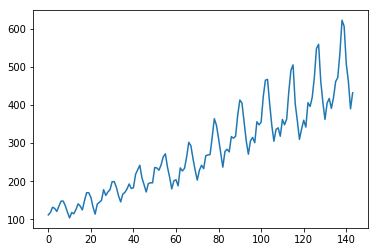

In [116]:
series = data[0:-1,1].reshape(len(data[0:-1,1]),1)
series = series.astype('int16')
window = 3

dataX,dataY = create_dataset(a=series, w=window)
X_train, X_test, y_train, y_test = train_test_split(dataX,dataY,test_size = 0.3, random_state=0)

X_train = np.array(X_train, dtype='int16')
y_train = np.array(y_train, dtype='int16')
X_test = np.array(X_test, dtype='int16')
y_test = np.array(y_test, dtype='int16')

plt.plot(series)
plt.show()

In [0]:
model = Sequential()
model.add(Dense(8,input_dim=window,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])


In [113]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.fit(X_train,y_train,epochs=2000,batch_size=2,verbose=2)

Epoch 1/2000
 - 0s - loss: 2869.2130 - acc: 0.0102
Epoch 2/2000
 - 0s - loss: 2752.8585 - acc: 0.0102
Epoch 3/2000
 - 0s - loss: 2601.7237 - acc: 0.0306
Epoch 4/2000
 - 0s - loss: 2534.3050 - acc: 0.0102
Epoch 5/2000
 - 0s - loss: 2473.0018 - acc: 0.0204
Epoch 6/2000
 - 0s - loss: 2387.0267 - acc: 0.0000e+00
Epoch 7/2000
 - 0s - loss: 2293.3087 - acc: 0.0102
Epoch 8/2000
 - 0s - loss: 2269.5776 - acc: 0.0306
Epoch 9/2000
 - 0s - loss: 2203.3935 - acc: 0.0102
Epoch 10/2000
 - 0s - loss: 2081.1474 - acc: 0.0102
Epoch 11/2000
 - 0s - loss: 2045.0987 - acc: 0.0102
Epoch 12/2000
 - 0s - loss: 2097.6996 - acc: 0.0000e+00
Epoch 13/2000
 - 0s - loss: 1917.3872 - acc: 0.0102
Epoch 14/2000
 - 0s - loss: 1918.4054 - acc: 0.0000e+00
Epoch 15/2000
 - 0s - loss: 1881.6565 - acc: 0.0000e+00
Epoch 16/2000
 - 0s - loss: 1766.6124 - acc: 0.0102
Epoch 17/2000
 - 0s - loss: 1772.0875 - acc: 0.0204
Epoch 18/2000
 - 0s - loss: 1697.6839 - acc: 0.0306
Epoch 19/2000
 - 0s - loss: 1687.0517 - acc: 0.0000e+00
E

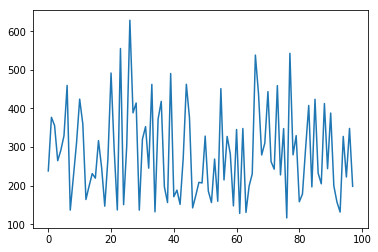

In [119]:
y = model.predict(X_train)
plt.plot(y)
plt.show()